Se tiene un dataset de Pokemons (All_Pokemon.csv), el cual tiene un resumen de la información
de pokemons de 8 generaciones. Se solicita realizar las siguientes acciones al dataset para
obtener resultados:  

Importación de librerías

In [1123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

Llamando al dataset

In [1124]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ruta del dataset

In [1125]:
ruta = "/content/drive/MyDrive/data/pokemon.csv"
df = pd.read_csv(ruta, index_col='Number')

Ejecución

In [1126]:
df.head()

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",45,49,49,65,65,45,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,0.7,6.9,14.1
2,Ivysaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",60,62,63,80,80,60,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,13.0,13.0
3,Venusaur,Grass,Poison,"['Chlorophyll', 'Overgrow']",80,82,83,100,100,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.0,100.0,25.0
3,Mega Venusaur,Grass,Poison,['Thick Fat'],80,100,123,122,120,80,...,1.0,1.0,1.0,1.0,1.0,1.0,0.5,2.4,155.5,27.0
4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,0.5,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6


A) Mostrar la información general del Dataset, y la información estadística resumida.

In [1127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1034 entries, 1 to 900
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     1034 non-null   object 
 1   Type 1                   1034 non-null   object 
 2   Type 2                   549 non-null    object 
 3   Abilities                1034 non-null   object 
 4   HP                       1034 non-null   int64  
 5   Att                      1034 non-null   int64  
 6   Def                      1034 non-null   int64  
 7   Spa                      1034 non-null   int64  
 8   Spd                      1034 non-null   int64  
 9   Spe                      1034 non-null   int64  
 10  BST                      1034 non-null   int64  
 11  Mean                     1034 non-null   float64
 12  Standard Deviation       1034 non-null   float64
 13  Generation               1034 non-null   float64
 14  Experience type          1034 

In [1128]:
df.describe()

,HP,Att,Def,Spa,Spd,Spe,BST,Mean,Standard Deviation,Generation,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
count,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,...,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000,1034.000000
mean,69.930368,80.544487,74.590909,72.908124,72.159574,68.609284,438.742747,73.123791,20.028863,4.431335,...,1.003143,1.239362,1.025629,0.974855,1.075677,0.991538,1.094052,1.287137,71.838491,136.528723
std,26.188367,32.514268,30.885981,32.764971,27.603097,30.225102,120.577842,20.096307,10.819824,2.265449,...,0.613302,0.698763,0.578387,0.377676,0.475708,0.511592,0.534657,1.390564,132.753724,3108.656552
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,29.166667,0.000000,1.000000,...,0.250000,0.250000,0.000000,0.000000,0.250000,0.250000,0.250000,0.100000,0.100000,0.000000
25%,50.000000,55.250000,50.000000,50.000000,50.000000,45.000000,330.000000,55.000000,12.808683,3.000000,...,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.600000,9.000000,18.600000
50%,67.000000,78.000000,70.000000,65.000000,70.000000,65.000000,460.000000,76.666667,18.531071,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,29.750000,28.350000
75%,83.000000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,85.833333,24.830537,6.000000,...,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.600000,71.425000,42.200000
max,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,130.000000,103.215659,8.000000,...,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,20.000000,999.900000,99990.000000


B) Imprimir la cantidad de filas duplicadas existentes en el dataset, y si existen duplicados
eliminar las filas. Crear un nuevo dataframe que contenga los pokemons sin las filas
duplicadas. (10 Pts)

In [1129]:
duplicados = df.duplicated()
duplicados.info()

<class 'pandas.core.series.Series'>
Index: 1034 entries, 1 to 900
Series name: None
Non-Null Count  Dtype
--------------  -----
1034 non-null   bool 
dtypes: bool(1)
memory usage: 9.1 KB


In [1130]:
filas_sin_duplicados = df.drop_duplicates()
dataframe_sin_duplicados = filas_sin_duplicados #Se crea una variable con un nombre comprensible

C) Contar todos los valores nulos existentes en el dataset (Columnas y Filas)e imprimirlos.
Luego, eliminar los valores nulos encontrados. Crear un nuevo dataframe, el cual ya no
tendrá datos nulos. (20 Pts)

In [1131]:
filas_nulas = df.isnull().any()
filas_nulas.info()

<class 'pandas.core.series.Series'>
Index: 43 entries, Name to BMI
Series name: None
Non-Null Count  Dtype
--------------  -----
43 non-null     bool 
dtypes: bool(1)
memory usage: 1.4+ KB


In [1132]:
sin_nulos = df.dropna() #Valores nulos eliminados
dataframe_sin_nulos = sin_nulos

D) Crear una función que permita filtrar los pokemons de tipo fuego. Mostrar los primeros
20 pokemons de tipo fuego en formato de tabla. (20 Pts)

In [1133]:
filtro_fuego = df[df['Type 1'].str.contains("Fire")]
filtro_fuego.head(20)

,Name,Type 1,Type 2,Abilities,HP,Att,Def,Spa,Spd,Spe,...,Against Bug,Against Rock,Against Ghost,Against Dragon,Against Dark,Against Steel,Against Fairy,Height,Weight,BMI
Number,,,,,,,,,,,,,,,,,,,,,
4,Charmander,Fire,NaN,"['Blaze', 'Solar Power']",39,52,43,60,50,65,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.6,8.5,23.6
5,Charmeleon,Fire,NaN,"['Blaze', 'Solar Power']",58,64,58,80,65,80,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.0,15.7
6,Charizard,Fire,Flying,"['Blaze', 'Solar Power']",78,84,78,109,85,100,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,90.5,31.3
6,Mega Charizard Y,Fire,Flying,['Drought'],78,104,78,159,115,100,...,0.25,4.0,1.0,1.0,1.0,0.5,0.5,1.7,100.5,34.8
6,Mega Charizard X,Fire,Dragon,['Tough Claws'],78,130,111,130,85,100,...,0.50,2.0,1.0,2.0,1.0,0.5,1.0,1.7,110.5,38.2
37,Vulpix,Fire,NaN,"['Drought', 'Flash Fire']",38,41,40,50,65,65,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.6,9.9,27.5
38,Ninetales,Fire,NaN,"['Drought', 'Flash Fire']",73,76,75,81,100,100,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.1,19.9,16.4
58,Growlithe,Fire,NaN,"['Flash Fire', 'Intimidate', 'Justified']",55,70,45,70,50,60,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,0.7,19.0,38.8
59,Arcanine,Fire,NaN,"['Flash Fire', 'Intimidate', 'Justified']",90,110,80,100,80,95,...,0.50,2.0,1.0,1.0,1.0,0.5,0.5,1.9,155.0,42.9


E) Obtener el promedio del nivel de Defensa de los Pokémons tipo fuego. (10 Pts)

In [1134]:
filtro_defensa = filtro_fuego['Def']
promedio_defensa = filtro_defensa.mean()
print(f"El promedio de la defensa de los pokemon tipo fuego es de: {promedio_defensa: .2f}")

El promedio de la defensa de los pokemon tipo fuego es de:  68.08


F) Crear los siguientes gráficos utilizando Matplotlib: (30 Pts)
● Gráfico de Barra: Este gráfico debe mostrar el top 10 de Pokemons tipo fuego
por su nivel de ataque.

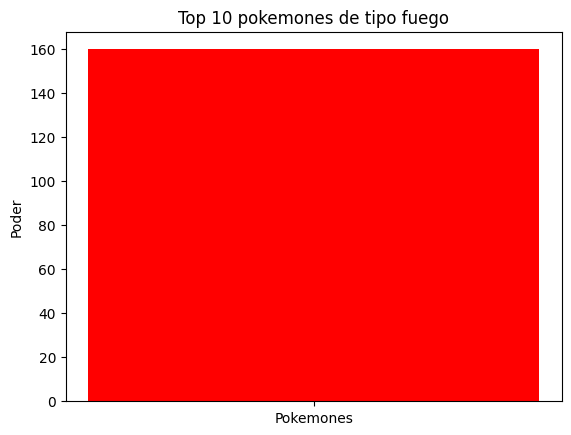

In [1135]:
conteo = filtro_fuego['Att']
etiquetas = ['Pokemones']
plt.bar(etiquetas, conteo.sort_index(), color=['red'])
plt.title('Top 10 pokemones de tipo fuego')
plt.ylabel('Poder')
plt.show()

Gráfico de Línea: Este gráfico debe mostrar la cantidad de pokemons de tipo
fuego por generación. Agregar un marcador circular y etiqueta de datos sobre el
marcador.

In [1136]:
gen = filtro_fuego['Generation']
